In [1]:
#import required libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sesd
matplotlib.rcParams['figure.figsize'] = (15,7)

In [2]:
# Generate a random data for weekend and weekdays. 
np.random.seed(0)
weekday = np.random.uniform(20,30, size = 100).astype(int).reshape(20,5)
weekend = np.random.uniform(50,56,40).astype(int).reshape(20,2)

In [3]:
# Concatenate data to create a time-series. Data will have seasonality of weekly
time_series = np.concatenate((weekday,weekend), axis=1).ravel()

In [4]:
# Change some values in series to introduce anomaly (2 on weekdays and 2 on weekends).
manipulated_series = np.copy(time_series)
manipulated_series[27] = 70
manipulated_series[44] = 40
manipulated_series[61] = 65
manipulated_series[116] = 35

In [5]:
# Using Seasonal Hybrid ESD with a seasonality of 7 i.e. a week. It returns the anomalous indices of time series
anomaly_index = sesd.seasonal_esd(manipulated_series, seasonality=7, hybrid=True, max_anomalies=5)

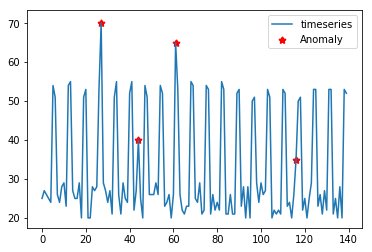

In [6]:
# Plot time-series along with anomalous point
plt.plot(manipulated_series, label = 'timeseries')
plt.scatter(anomaly_index, manipulated_series[anomaly_index], marker = '*', color='red', linewidths='2', label = 'Anomaly')
plt.legend()